In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import plotly.io as pio
pio.renderers.default = 'png'
import plotly.express as px

In [3]:
data=pd.read_feather(r'E:\zeyad\data analyst projects\Sales project\Sales_data.ftr')

In [4]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
data.shape

(186850, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [8]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [9]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
data.dropna(subset=['Product'],inplace=True)

In [11]:
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [12]:
data.shape

(186305, 6)

In [13]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [14]:
data.duplicated().sum()

618

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.shape

(185687, 6)

In [17]:
data[data['Quantity Ordered']=='Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [18]:
data.reset_index(inplace=True)

In [19]:
data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [20]:
data.drop([516],axis=0,inplace=True)

In [21]:
data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [22]:
data['Quantity Ordered']=data['Quantity Ordered'].astype('int')

In [23]:
data['Price Each']=data['Price Each'].astype('float')

In [24]:
data['Order Date']=pd.to_datetime(data['Order Date'])

In [25]:
data.drop('index',axis=1,inplace=True)

In [26]:
data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [27]:
data.describe()

,Quantity Ordered,Price Each
count,185686.000000,185686.000000
mean,1.124544,184.519255
std,0.443069,332.843838
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


In [28]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [29]:
data['Total_price']=data['Quantity Ordered']* data['Price Each']

In [30]:
data=data.set_index(['Order Date'])

In [31]:
months=data[['Total_price']].resample('M').sum().sort_values('Total_price',ascending=False)

In [32]:
import plotly.express as px

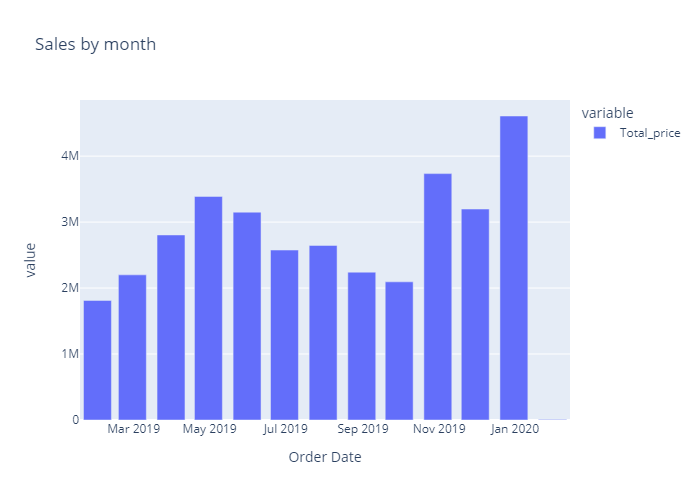

In [33]:
 px.bar(months,title='Sales by month')

In [34]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Total_price
Order Date,,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",23.90
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",99.99
2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",600.00
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",11.99
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",11.99


In [35]:
data.reset_index(inplace=True)

In [36]:
data.head()

,Order Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Total_price
0,2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",23.90
1,2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",99.99
2,2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",600.00
3,2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",11.99
4,2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",11.99


In [37]:
data['Purchase Address'][0].split(' ')[3]

'Dallas,'

In [38]:
def city(x):
    return x.split(',')[1]

In [39]:
data['city']=data['Purchase Address'].apply(city)

In [40]:
data.head()

,Order Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Total_price,city
0,2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",23.90,Dallas
1,2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",99.99,Boston
2,2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles
3,2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles
4,2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles


<Axes: xlabel='city'>

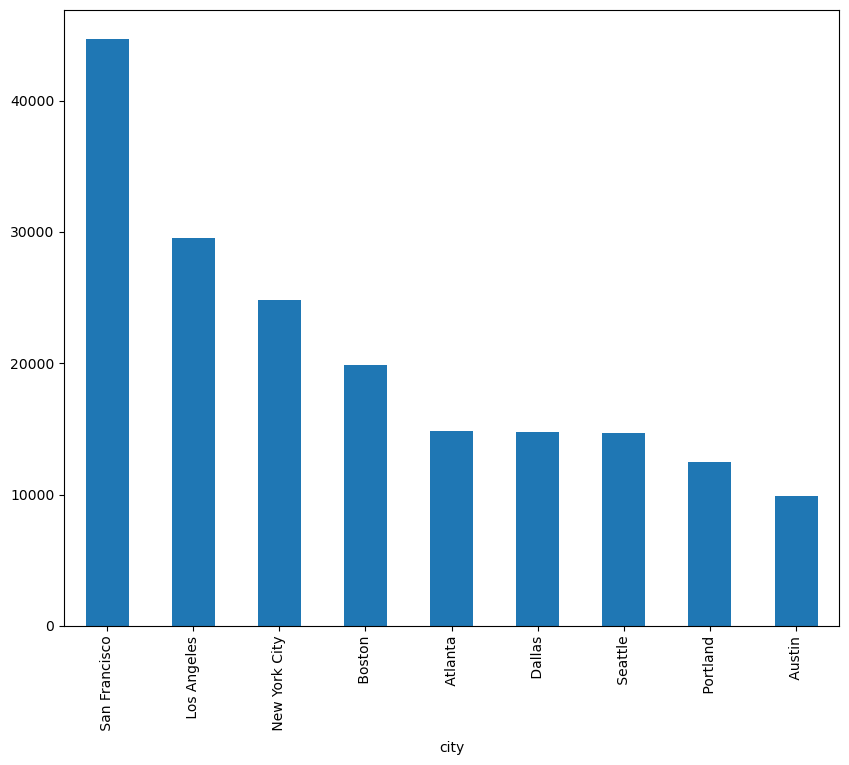

In [41]:
plt.figure(figsize=(10,8))
data.groupby('city')['Quantity Ordered'].count().sort_values(ascending=False).plot(kind='bar')

In [42]:
product=data.groupby('Product').agg({'Quantity Ordered':'sum' , 'Price Each':'mean'}).sort_values('Quantity Ordered', ascending=False)

In [43]:
product

,Quantity Ordered,Price Each
Product,,
AAA Batteries (4-pack),30986,2.99
AA Batteries (4-pack),27615,3.84
USB-C Charging Cable,23931,11.95
Lightning Charging Cable,23169,14.95
Wired Headphones,20524,11.99
Apple Airpods Headphones,15637,150.00
Bose SoundSport Headphones,13430,99.99
27in FHD Monitor,7541,149.99
iPhone,6847,700.00


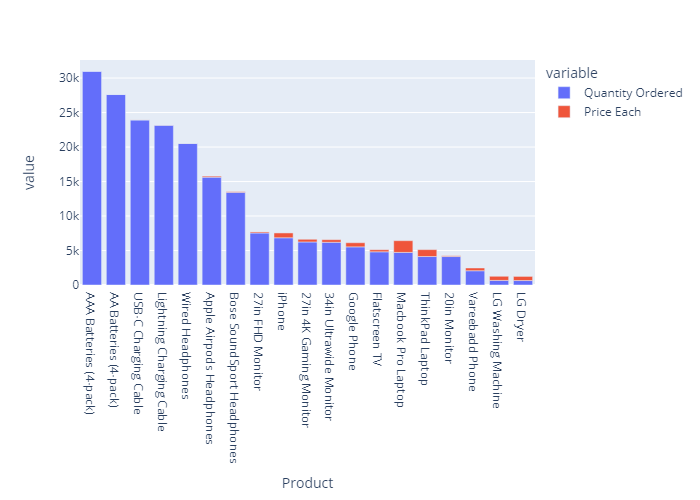

In [44]:
px.bar(product)

In [45]:
most_sold_products=data['Product'].value_counts()[0:5].index

In [46]:
most_sold_products_df=data[data['Product'].isin(most_sold_products)]

In [47]:
most_sold_products_df.head()

,Order Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Total_price,city
0,2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",23.90,Dallas
3,2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles
4,2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles
5,2019-04-29 13:03:00,176562,USB-C Charging Cable,1,11.95,"381 Wilson St, San Francisco, CA 94016",11.95,San Francisco
7,2019-04-12 10:58:00,176564,USB-C Charging Cable,1,11.95,"790 Ridge St, Atlanta, GA 30301",11.95,Atlanta


In [48]:
most_sold_products_df['Order Date']=most_sold_products_df['Order Date'].astype('str')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14520\3940270853.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
most_sold_products_df['Order Date'][0].split(' ')[0].split('-')[1]

'04'

In [50]:
def month(x):
    return x.split(' ')[0].split('-')[1]


In [51]:
most_sold_products_df['month']=most_sold_products_df['Order Date'].apply(month)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14520\43020698.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
most_sold_products_df.tail()

,Order Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Total_price,city,month
185676,2019-09-01 22:14:00,259349,AAA Batteries (4-pack),1,2.99,"911 River St, Dallas, TX 75001",2.99,Dallas,09
185678,2019-09-30 13:49:00,259350,USB-C Charging Cable,1,11.95,"519 Maple St, San Francisco, CA 94016",11.95,San Francisco,09
185680,2019-09-07 15:49:00,259352,USB-C Charging Cable,1,11.95,"976 Forest St, San Francisco, CA 94016",11.95,San Francisco,09
185681,2019-09-17 20:56:00,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",8.97,Los Angeles,09
185685,2019-09-30 00:18:00,259357,USB-C Charging Cable,1,11.95,"250 Meadow St, San Francisco, CA 94016",11.95,San Francisco,09


In [53]:
pivot_table=pd.crosstab(most_sold_products_df['month'],most_sold_products_df['Product'])

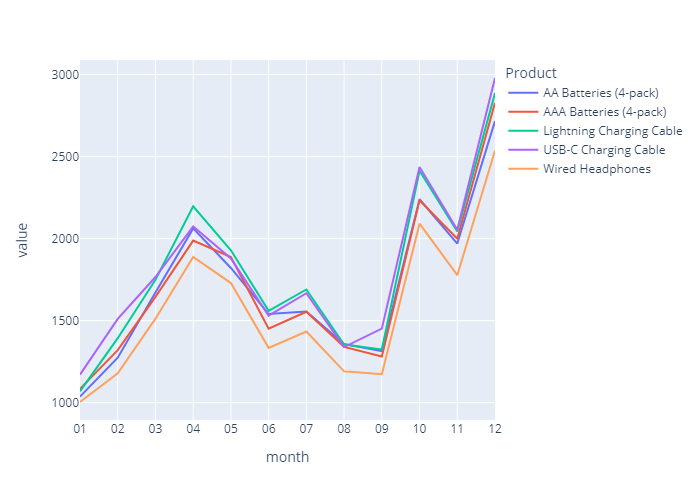

In [54]:
px.line(pivot_table)

In [55]:
data.head()

,Order Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Total_price,city
0,2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",23.90,Dallas
1,2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",99.99,Boston
2,2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles
3,2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles
4,2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles


In [56]:
Top_10_orders=data.groupby(['Order ID'])['Total_price'].sum().sort_values(ascending=False).head(10)

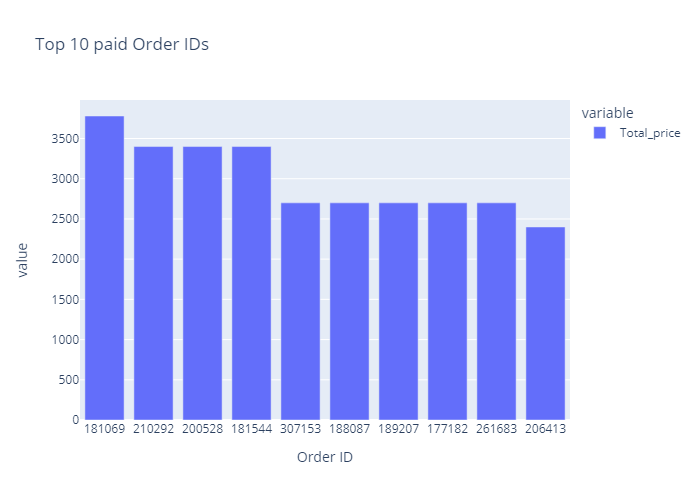

In [57]:
px.bar(Top_10_orders,title='Top 10 paid Order IDs')

In [58]:
multiple_product=data[data['Order ID'].duplicated(keep=False)]

In [59]:
multiple_product.head()

,Order Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Total_price,city
2,2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles
3,2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles
17,2019-04-03 19:42:00,176574,Google Phone,1,600.00,"20 Hill St, Los Angeles, CA 90001",600.00,Los Angeles
18,2019-04-03 19:42:00,176574,USB-C Charging Cable,1,11.95,"20 Hill St, Los Angeles, CA 90001",11.95,Los Angeles
30,2019-04-10 17:00:00,176586,AAA Batteries (4-pack),2,2.99,"365 Center St, San Francisco, CA 94016",5.98,San Francisco


In [60]:
group=multiple_product.groupby(['Order ID'])['Product'].apply(lambda x: ','.join(x)).reset_index().rename(columns={'Product':'grouped_products'})

In [61]:
multiple_product=multiple_product.merge(group, how='left', on='Order ID')

In [62]:
multiple_product.head()

,Order Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Total_price,city,grouped_products
0,2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles,"Google Phone,Wired Headphones"
1,2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles,"Google Phone,Wired Headphones"
2,2019-04-03 19:42:00,176574,Google Phone,1,600.00,"20 Hill St, Los Angeles, CA 90001",600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,2019-04-03 19:42:00,176574,USB-C Charging Cable,1,11.95,"20 Hill St, Los Angeles, CA 90001",11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,2019-04-10 17:00:00,176586,AAA Batteries (4-pack),2,2.99,"365 Center St, San Francisco, CA 94016",5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"


In [63]:
multiple_product.drop_duplicates(subset='Order ID',inplace=True)

In [64]:
multiple_product.head()

,Order Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Total_price,city,grouped_products
0,2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles,"Google Phone,Wired Headphones"
2,2019-04-03 19:42:00,176574,Google Phone,1,600.00,"20 Hill St, Los Angeles, CA 90001",600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
4,2019-04-10 17:00:00,176586,AAA Batteries (4-pack),2,2.99,"365 Center St, San Francisco, CA 94016",5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
6,2019-04-12 11:07:00,176672,Lightning Charging Cable,1,14.95,"778 Maple St, New York City, NY 10001",14.95,New York City,"Lightning Charging Cable,USB-C Charging Cable"
8,2019-04-20 10:39:00,176681,Apple Airpods Headphones,1,150.00,"331 Cherry St, Seattle, WA 98101",150.00,Seattle,"Apple Airpods Headphones,ThinkPad Laptop"


In [65]:
multiple_product.shape

(6879, 9)

<Axes: ylabel='grouped_products'>

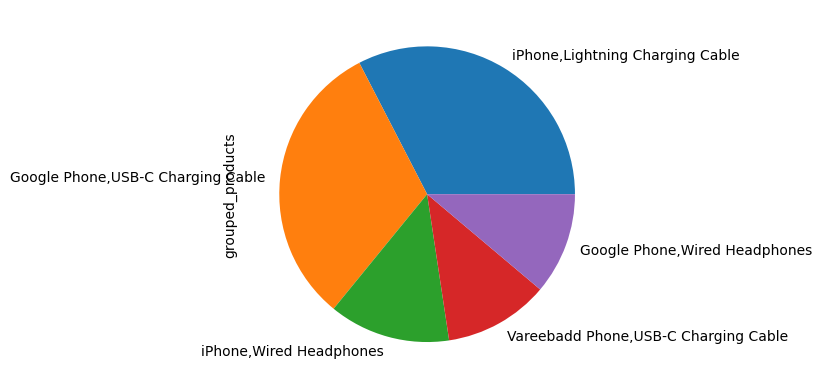

In [66]:
multiple_product['grouped_products'].value_counts().head(5).plot.pie()